In [ ]:
#Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple


# Get data (file : valeursfoncieres-2020 )

In [ ]:
def get_data(url):
  df = pd.read_csv(url, low_memory=False)
  print("data.shape : ", df.shape)
  return df

url = 'https://files.data.gouv.fr/geo-dvf/latest/csv/2020/full.csv.gz'
df = get_data(url)
data = df.copy()

data.shape :  (2459560, 40)


In [ ]:
 data.head(2)


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2020-1,2020-01-07,1,Vente,8000.0,NaN,NaN,FORTUNAT,B063,1250.0,01072,Ceyzériat,01,NaN,NaN,01072000AK0216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T,terres,NaN,NaN,1061.0,5.323540,46.171919
1,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,1290.0,01203,Laiz,01,NaN,NaN,012030000B0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,BT,taillis simples,NaN,NaN,85.0,4.893436,46.251868


In [ ]:
def get_features_mean(df):
  return pd.DataFrame(df.describe().loc['mean', :]).T

get_features_mean(data)

,numero_disposition,valeur_fonciere,adresse_numero,code_postal,ancien_code_commune,lot1_surface_carrez,lot2_surface_carrez,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
mean,1.075359,751173.518471,697.708337,51783.628718,49382.0,62.174993,64.32041,77.257879,115.153181,94.285298,129.230268,104.524725,0.39146,1.957431,115.052354,2.501026,2862.548819,2.036065,46.659174


In [ ]:
def get_data_informations(df):
  dict_ = {'shap' : df.shape, '': '', 'describ': df.describe(), 'infos': df.info()}
  return dict_

properties = get_data_informations(df = data)
properties.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459560 entries, 0 to 2459559
Data columns (total 40 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id_mutation                   object 
 1   date_mutation                 object 
 2   numero_disposition            int64  
 3   nature_mutation               object 
 4   valeur_fonciere               float64
 5   adresse_numero                float64
 6   adresse_suffixe               object 
 7   adresse_nom_voie              object 
 8   adresse_code_voie             object 
 9   code_postal                   float64
 10  code_commune                  object 
 11  nom_commune                   object 
 12  code_departement              object 
 13  ancien_code_commune           float64
 14  ancien_nom_commune            object 
 15  id_parcelle                   object 
 16  ancien_id_parcelle            object 
 17  numero_volume                 object 
 18  lot1_numero           

dict_keys(['shap', '', 'describ', 'infos'])

# Inspect features

In [ ]:
def get_data_columns(df):
  L = np.array(list(df.columns)).T
  return L
cols = get_data_columns(df = data)
cols

array(['id_mutation', 'date_mutation', 'numero_disposition',
       'nature_mutation', 'valeur_fonciere', 'adresse_numero',
       'adresse_suffixe', 'adresse_nom_voie', 'adresse_code_voie',
       'code_postal', 'code_commune', 'nom_commune', 'code_departement',
       'ancien_code_commune', 'ancien_nom_commune', 'id_parcelle',
       'ancien_id_parcelle', 'numero_volume', 'lot1_numero',
       'lot1_surface_carrez', 'lot2_numero', 'lot2_surface_carrez',
       'lot3_numero', 'lot3_surface_carrez', 'lot4_numero',
       'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez',
       'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture',
       'code_nature_culture_speciale', 'nature_culture_speciale',
       'surface_terrain', 'longitude', 'latitude'], dtype='<U28')

## Data dtypes

In [ ]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

### float64

In [ ]:
def get_float_columns(df):
  list_floats = list(df.select_dtypes(include=['float64']).columns)
  return list_floats

list_floats = get_float_columns(df = data)
print(len(list_floats))

17


In [ ]:
np.array(list_floats)

array(['valeur_fonciere', 'adresse_numero', 'code_postal',
       'ancien_code_commune', 'lot1_surface_carrez',
       'lot2_surface_carrez', 'lot3_surface_carrez', 'lot4_numero',
       'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez',
       'code_type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'surface_terrain', 'longitude',
       'latitude'], dtype='<U25')

### int64

In [ ]:
def get_int_columns(df):
  list_int = list(df.select_dtypes(include=['int64']).columns)
  return list_int

list_int = get_int_columns(df = data)
print(len(list_int))
np.array(list_int)

2


array(['numero_disposition', 'nombre_lots'], dtype='<U18')

### Object

In [ ]:
def get_object_columns(df):
  list_objects = list(df.select_dtypes(include=['O']).columns)
  return list_objects

list_objects = get_object_columns(df = data)
print(len(list_objects))
np.array(list_objects)

21


array(['id_mutation', 'date_mutation', 'nature_mutation',
       'adresse_suffixe', 'adresse_nom_voie', 'adresse_code_voie',
       'code_commune', 'nom_commune', 'code_departement',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot2_numero', 'lot3_numero',
       'type_local', 'code_nature_culture', 'nature_culture',
       'code_nature_culture_speciale', 'nature_culture_speciale'],
      dtype='<U28')


## Visualizing dtypes
---



In [ ]:
dic = {'Objects': len(list_objects), 'float': len(list_floats), 'int': len(list_int)}
pd.DataFrame(dic, index=[0])

,Objects,float,int
0,21,17,2


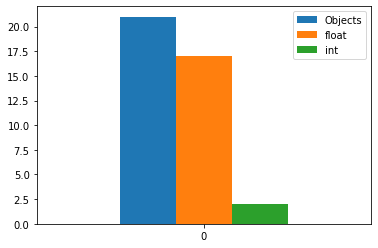

In [ ]:
pd.DataFrame(dic, index=[0]).plot(kind='bar', rot=0)

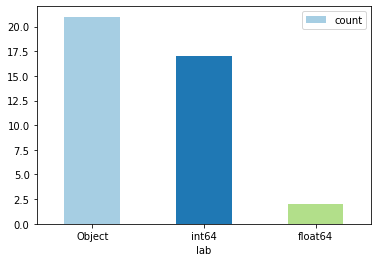

In [ ]:
def visualize_feature_types(df):
  list_floats = get_float_columns(df)
  list_objects = get_object_columns(df)
  list_int = get_int_columns(df)

  dx = pd.DataFrame({'lab':['Object','int64', 'float64'], 'count':[len(list_objects), len(list_floats), len(list_int)]})
  dx.plot.bar(x='lab', y='count', rot=0, color=plt.cm.Paired(np.arange(3)));


visualize_feature_types(df = data)


## Type_local

In [ ]:
data['type_local'].value_counts()

Maison                                      528257
Appartement                                 402271
Dépendance                                  298369
Local industriel. commercial ou assimilé     86937
Name: type_local, dtype: int64

### Visualizing type_local Before cleaning data

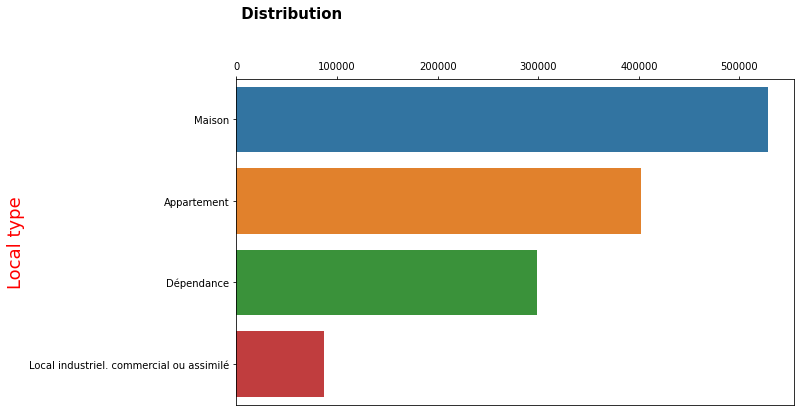

In [ ]:
def visualize_type_local(df):
  fig, ax = plt.subplots(figsize = (10,6))

  sns.countplot(y = 'type_local', data = df, order = df['type_local'].value_counts().index)
  plt.ylabel('Local type', size = 18, color='red')
  ax.xaxis.set_ticks_position('top')
  ax.set_xlabel('')   
  plt.title(' Distribution', size = 15, weight=600, pad = 60, loc = 'left')

  plt.show();

visualize_type_local(df = data)

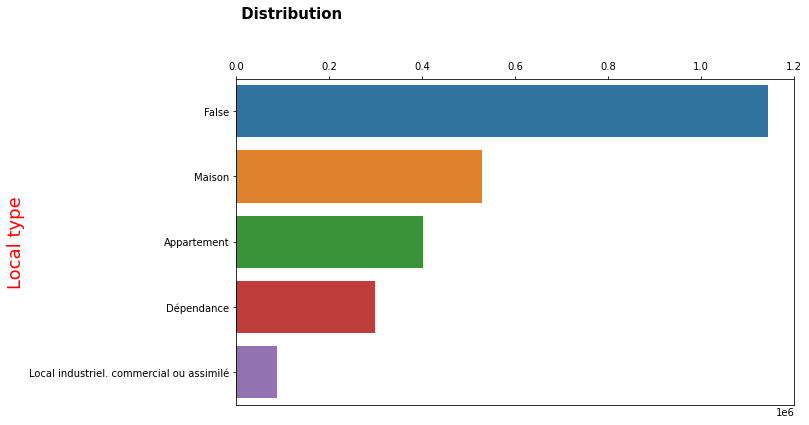

In [ ]:
def visualize_type_local_fillna(df):
  fig, ax = plt.subplots(figsize = (10,6))

  df['type_local'] = df['type_local'].fillna(False)

  sns.countplot(y = 'type_local', data = df, order = df['type_local'].value_counts().index)
  plt.ylabel('Local type', size = 18, color='red')
  ax.xaxis.set_ticks_position('top')
  ax.set_xlabel('')   
  plt.title(' Distribution', size = 15, weight=600, pad = 60, loc = 'left')

  plt.show();

visualize_type_local_fillna(df = data)


### Getting industrial local_type

In [ ]:
def get_one_local_type(df, string):# df : dataframe && string :value of df['type_local']
  data = df[df['type_local'] == string]
  return data
industrial_data = get_one_local_type(df = data, string = 'Local industriel. commercial ou assimilé')
industrial_data.head(2)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
90,2020-42,2020-01-13,1,Vente,135000.0,300.0,NaN,RTE DE PONT D AIN,0001,1160.0,01273,Neuville-sur-Ain,01,NaN,NaN,012730000E1770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.0,Local industriel. commercial ou assimilé,401.0,0.0,S,sols,NaN,NaN,833.0,5.374276,46.071405
166,2020-72,2020-01-20,1,Vente,299000.0,32.0,NaN,RUE MAL FOCH,2520,1000.0,01053,Bourg-en-Bresse,01,NaN,NaN,01053000AD0186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.0,Local industriel. commercial ou assimilé,250.0,0.0,S,sols,NaN,NaN,216.0,5.228472,46.205324


In [ ]:
dependance_data = get_one_local_type(df = data, string = 'Dépendance')
dependance_data.head(2)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
18,2020-9,2020-01-03,1,Vente,350750.0,904.0,B,CHE DES GDES CADALLES,0149,1000.0,01344,Saint-Denis-lès-Bourg,01,NaN,NaN,01344000AC0039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,S,sols,NaN,NaN,1497.0,5.200634,46.210371
19,2020-9,2020-01-03,1,Vente,350750.0,904.0,B,CHE DES GDES CADALLES,0149,1000.0,01344,Saint-Denis-lès-Bourg,01,NaN,NaN,01344000AC0039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,J,jardins,NaN,NaN,1267.0,5.200634,46.210371


In [ ]:
len(industrial_data), len(dependance_data), len(data)

(86937, 298369, 2459560)

### Extracting industrial local_type

In [ ]:
data = df.copy()
whole_data = df.copy()
whole_data.shape

(2459560, 40)

In [ ]:
def extract_one_local_type(df, string):# df: dataframe && string :value of df['type_local']

  # Get names of indexes for which column type_local is 'Local industriel. commercial ou assimilé'
  indexNames = df[df['type_local'] == string].index
  # Delete these row indexes from dataFrame
  df.drop(indexNames , inplace=True)
  return df

data_industrial_out = extract_one_local_type(df = data, string = 'Local industriel. commercial ou assimilé')
data_industrial_out.shape, whole_data.shape, data.shape


((2372623, 40), (2459560, 40), (2372623, 40))

**Below, we work with the whole data (including industrial type)**

## Exploring missing values (NaN) for whole Data : all local types are included

```
# Ce texte est au format code
```



### Columns with NaN

In [ ]:
def get_count_of_missing_values(df):
  missing_df = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
  return missing_df

missing_df = get_count_of_missing_values(df = whole_data)
missing_df

,0
ancien_code_commune,2459559
ancien_nom_commune,2459559
ancien_id_parcelle,2459559
lot5_surface_carrez,2458997
lot4_surface_carrez,2458303
lot5_numero,2455417
lot3_surface_carrez,2454703
numero_volume,2452794
lot4_numero,2450649
lot3_numero,2434251


In [ ]:
L = [] #missing_df['Dtype']
for i in missing_df.index:
  if i in list_objects:
    L.append('Object')
  elif i in list_floats:
    L.append('float')
  else:
    L.append('int')

missing_df['Dtype'] = L
missing_df

,0,Dtype
ancien_code_commune,2459559,float
ancien_nom_commune,2459559,Object
ancien_id_parcelle,2459559,Object
lot5_surface_carrez,2458997,float
lot4_surface_carrez,2458303,float
lot5_numero,2455417,float
lot3_surface_carrez,2454703,float
numero_volume,2452794,Object
lot4_numero,2450649,float
lot3_numero,2434251,Object


In [ ]:
def get_columns_with_missing_values(df): #df dataframe
  missing_df = get_count_of_missing_values(df =df)
  missing_data = missing_df[missing_df[0] !=0]
  return missing_data

missing_data = get_columns_with_missing_values(df = whole_data)
print(len(missing_data.index)), missing_data.index

31


(None,
 Index(['ancien_code_commune', 'ancien_nom_commune', 'ancien_id_parcelle',
        'lot5_surface_carrez', 'lot4_surface_carrez', 'lot5_numero',
        'lot3_surface_carrez', 'numero_volume', 'lot4_numero', 'lot3_numero',
        'lot2_surface_carrez', 'adresse_suffixe', 'nature_culture_speciale',
        'code_nature_culture_speciale', 'lot2_numero', 'lot1_surface_carrez',
        'lot1_numero', 'surface_reelle_bati', 'nombre_pieces_principales',
        'code_type_local', 'type_local', 'adresse_numero', 'surface_terrain',
        'code_nature_culture', 'nature_culture', 'valeur_fonciere',
        'adresse_nom_voie', 'code_postal', 'adresse_code_voie', 'latitude',
        'longitude'],
       dtype='object'))

**There ara 31 columns with NaN**

### Columns without NaN

In [ ]:
def get_columns_without_missing_values(df): #df dataframe
  missing_df = get_count_of_missing_values(df =df)
  clean_data = missing_df[missing_df[0] ==0]
  return clean_data

clean_data = get_columns_without_missing_values(df = whole_data)
print(len(clean_data.index)), clean_data.index

9


(None, Index(['code_commune', 'nom_commune', 'code_departement', 'id_parcelle',
        'nombre_lots', 'nature_mutation', 'numero_disposition', 'date_mutation',
        'id_mutation'],
       dtype='object'))

**There ara 9 columns without NaN**

### Object Features

#### #ancien_nom_commune# vs.      #nom_commune#

In [ ]:
def get_info_of_col_name(df, col_name):# df : dataframe && col_name :column value 

  return list(df[col_name].unique())

get_info_of_col_name(df = whole_data, col_name = 'ancien_nom_commune')


[nan, 'Le Fresne-sur-Loire']

In [ ]:
#!pip install -U featuretools

In [ ]:
len(get_info_of_col_name(df = whole_data, col_name = 'nom_commune'))

29092

In [ ]:
#print("There are",  29092 "distinct communes names")

In [ ]:
if np.where(whole_data['nom_commune'].unique() == 'Le Fresne-sur-Loire')[0].size ==0:
  print("'Le Fresne-sur-Loire' does not exist")
else:
  print("'Le Fresne-sur-Loire' exists")

'Le Fresne-sur-Loire' does not exist


#### #ancien_code_commune# vs.      #code_commune#

In [ ]:
get_info_of_col_name(df = whole_data, col_name = 'ancien_code_commune')


[nan, 49382.0]

In [ ]:
code_commune = whole_data['ancien_code_commune'].unique()[1]
print("code_commune : ", code_commune)

indexx = np.where(whole_data['ancien_code_commune'] == code_commune)[0][0]
indexx

code_commune :  49382.0


1044653

In [ ]:
dt = pd.DataFrame(whole_data.loc[indexx]).T
dt

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
1044653,2020-436891,2020-12-23,1,Vente,97500,NaN,NaN,NaN,NaN,NaN,49160,Ingrandes-Le Fresne sur Loire,49,49382,Le Fresne-sur-Loire,491603820B1194,440600000B1194,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.924853,47.401


In [ ]:
dt.isnull().sum().value_counts() #1 --> NaN  @@ 0 --> value

1    24
0    16
dtype: int64

In [ ]:
whole_data.loc[indexx, :]

id_mutation                                       2020-436891
date_mutation                                      2020-12-23
numero_disposition                                          1
nature_mutation                                         Vente
valeur_fonciere                                         97500
adresse_numero                                            NaN
adresse_suffixe                                           NaN
adresse_nom_voie                                          NaN
adresse_code_voie                                         NaN
code_postal                                               NaN
code_commune                                            49160
nom_commune                     Ingrandes-Le Fresne sur Loire
code_departement                                           49
ancien_code_commune                                     49382
ancien_nom_commune                        Le Fresne-sur-Loire
id_parcelle                                    491603820B1194
ancien_i

#### #ancien_id_parcelle# vs.      #id_parcelle#

In [ ]:
get_info_of_col_name(df = whole_data, col_name = 'ancien_id_parcelle')


[nan, '440600000B1194']

**Conclusion : drop the columns : ancien_nom_commune, ancien_code_commune, and ancien_id_parcelle**
    

#### lot_surface_carrez from 1 to 5

In [ ]:
whole_data['lot5_surface_carrez'].isnull().sum()


2458997

In [ ]:
missing_df.loc['lot5_surface_carrez'][0]

2458997

In [ ]:
whole_data.shape[0] - missing_df.loc['lot5_surface_carrez'][0]

563

In [ ]:
def decide_drop_column(df, col_name): #df dataframe && col_name : name of column 
    missing_df = get_count_of_missing_values(df =df)
    return df.shape[0] - missing_df.loc[col_name][0]

In [ ]:
decide_drop_column(df = whole_data, col_name= 'lot5_surface_carrez')

563

**There are 563 real values  ----> drop this Column**

In [ ]:
decide_drop_column(df = whole_data, col_name= 'lot4_surface_carrez')

1257

In [ ]:
decide_drop_column(df = whole_data, col_name= 'lot3_surface_carrez')

4857

In [ ]:
decide_drop_column(df = whole_data, col_name= 'lot2_surface_carrez')

51041

In [ ]:
decide_drop_column(df = whole_data, col_name= 'lot1_surface_carrez')

209280

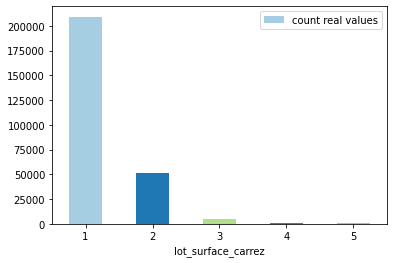

In [ ]:
def visualize_lot_surface_columns(df):
  L = ['lot1_surface_carrez', 'lot2_surface_carrez',
       'lot3_surface_carrez', 'lot4_surface_carrez',
       'lot5_surface_carrez']
  K = []
  for i in L:
    m = decide_drop_column(df = df, col_name= i)
    K.append(m)

  dx = pd.DataFrame({'lot_surface_carrez':list(np.arange(1,6)), 'count real values':K})
  dx.plot.bar(x='lot_surface_carrez', y='count real values', rot=0, color=plt.cm.Paired(np.arange(5)));


visualize_lot_surface_columns(df = whole_data)

**I suggest to drop Columns lot3_surface_carrez, lot4_surface_carrez, and lot5_surface_carrez**

#### lot_numero

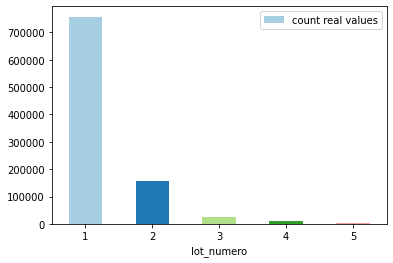

In [ ]:
def visualize_lot_numero_columns(df):
  L = ['lot1_numero', 'lot2_numero',
       'lot3_numero', 'lot4_numero',
       'lot5_numero']
  K = []
  for i in L:
    m = decide_drop_column(df = df, col_name= i)
    K.append(m)

  dx = pd.DataFrame({'lot_numero':list(np.arange(1,6)), 'count real values':K})
  dx.plot.bar(x='lot_numero', y='count real values', rot=0, color=plt.cm.Paired(np.arange(5)));


visualize_lot_numero_columns(df = whole_data)

## Exploring missing values (NaN) for Data, excluding Industrial local type 


In [ ]:
# To check that industrial local type does not exist in this data
data['type_local'].value_counts()

Maison         528257
Appartement    402271
Dépendance     298369
Name: type_local, dtype: int64

In [ ]:
missing_df = get_count_of_missing_values(df = data)
missing_df

,0
ancien_code_commune,2372622
ancien_nom_commune,2372622
ancien_id_parcelle,2372622
lot5_surface_carrez,2372302
lot4_surface_carrez,2371776
lot5_numero,2370089
lot3_surface_carrez,2368557
lot4_numero,2366244
numero_volume,2365857
lot3_numero,2351577


In [ ]:
L = [] #missing_df['Dtype']
for i in missing_df.index:
  if i in list_objects:
    L.append('Object')
  elif i in list_floats:
    L.append('float')
  else:
    L.append('int')

missing_df['Dtype'] = L
missing_df

,0,Dtype
ancien_code_commune,2372622,float
ancien_nom_commune,2372622,Object
ancien_id_parcelle,2372622,Object
lot5_surface_carrez,2372302,float
lot4_surface_carrez,2371776,float
lot5_numero,2370089,float
lot3_surface_carrez,2368557,float
lot4_numero,2366244,float
numero_volume,2365857,Object
lot3_numero,2351577,Object


In [ ]:
get_info_of_col_name(df = data, col_name = 'ancien_nom_commune')

[nan, 'Le Fresne-sur-Loire']

In [ ]:
len(get_info_of_col_name(df = data, col_name = 'nom_commune'))

29082

In [ ]:
if np.where(data['nom_commune'].unique() == 'Le Fresne-sur-Loire')[0].size ==0:
  print("'Le Fresne-sur-Loire' does not exist")
else:
  print("'Le Fresne-sur-Loire' exists")

'Le Fresne-sur-Loire' does not exist


In [ ]:
get_info_of_col_name(df = data, col_name = 'ancien_code_commune')

[nan, 49382.0]

In [ ]:
code_commune = data['ancien_code_commune'].unique()[1]
print("code_commune : ", code_commune)

indexx = np.where(data['ancien_code_commune'] == code_commune)[0][0]
indexx

code_commune :  49382.0


1011854

In [ ]:
dt = pd.DataFrame(data.loc[indexx]).T
dt

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
1011854,2020-422038,2020-09-09,1,Vente,200000,3,NaN,AV SAINT THOMAS,7760,44100,44109,Nantes,44,NaN,NaN,44109000LN0315,NaN,NaN,41,NaN,50,67.37,NaN,NaN,NaN,NaN,NaN,NaN,2,2,Appartement,66,4,NaN,NaN,NaN,NaN,NaN,-1.59273,47.2171


In [ ]:
dt.isnull().sum().value_counts() #1 --> NaN  @@ 0 --> value

0    23
1    17
dtype: int64

In [ ]:
get_info_of_col_name(df = data, col_name = 'ancien_id_parcelle')

[nan, '440600000B1194']

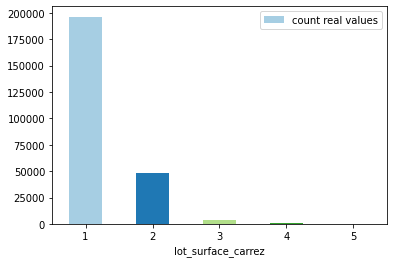

In [ ]:
visualize_lot_surface_columns(df = data)

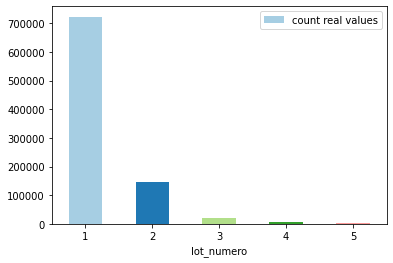

In [ ]:
visualize_lot_numero_columns(df = data)